In [1]:
import spatialdata as sd

In [2]:
from spatialdata_io import visium, visium_hd, xenium

In [3]:
import spatialdata as sd
import spatialdata_plot as sdp
from spatialdata_io import visium, visium_hd, xenium
import matplotlib.pyplot as plt

In [ ]:
!pwd

In [ ]:
# !mkdir data

We will download the following spatial multi-omic dataset to prepare for the `Mongoose` pipeline

https://www.10xgenomics.com/datasets/gene-and-protein-expression-library-of-human-breast-cancer-cytassist-ffpe-2-standard

In [ ]:
data_path = "./data/"

In [ ]:
!curl -O https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_filtered_feature_bc_matrix.h5


In [ ]:
!curl -O https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_spatial.tar.gz


In [ ]:
!curl -O https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_raw_probe_bc_matrix.h5


In [ ]:
!curl -O https://cf.10xgenomics.com/samples/spatial-exp/2.1.0/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer/CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_isotype_normalization_factors.csv

In [ ]:
# Sanity Check
!file CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_filtered_feature_bc_matrix.h5

In [ ]:
import tarfile
import os

# Define paths
tar_path = "CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_spatial.tar.gz"
extract_dir = "./"  # You can choose another directory if you like

# Create extraction directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

# Open and extract the tar.gz file
with tarfile.open(tar_path, "r:gz") as tar:
    tar.extractall(path=extract_dir)

print(f"Spatial data extracted to: {extract_dir}")
print("Extracted files:", os.listdir(extract_dir))


In [4]:
# Import the necessary modules
from spatialdata_io.readers.visium import visium as visium_reader
import spatialdata.models.models as models

# Save the original parse function
original_parse = models.Image2DModel.parse

# Define a patched version that removes the unexpected keyword argument 'rgb'
def patched_parse(*args, **kwargs):
    # Remove 'rgb' if present to avoid the TypeError
    kwargs.pop("rgb", None)
    return original_parse(*args, **kwargs)

# Apply the monkey-patch
models.Image2DModel.parse = patched_parse

# Now call the visium reader as usual
base_path = "./"
counts_file_name = "CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_filtered_feature_bc_matrix.h5"

sdata_visium = visium_reader(
    path=base_path,
    counts_file=counts_file_name,
    dataset_id="CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer"
)

print("Visium dataset loaded successfully!")


INFO     reading CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_filtered_feature_bc_matrix.h5               
Visium dataset loaded successfully!


/opt/homebrew/Caskroom/mambaforge/base/envs/spatial_mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/Caskroom/mambaforge/base/envs/spatial_mamba/lib/python3.9/site-packages/anndata/_core/anndata.py:1756: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/opt/homebrew/Caskroom/mambaforge/base/envs/spatial_mamba/lib/python3.9/site-packages/spatialdata/models/models.py:1018: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


In [5]:
sdata_visium

SpatialData object
├── Images
│     ├── 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_hires_image': DataArray[cyx] (3, 1957, 2000)
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_lowres_image': DataArray[cyx] (3, 587, 600)
├── Shapes
│     └── 'CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer': GeoDataFrame shape: (4169, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (4169, 18085)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_hires_image (Images), CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer (Shapes)
    ▸ 'downscaled_lowres', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_lowres_image (Images), CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer (Shapes)
    ▸ 'global', with elements:
        CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer (Shapes)

INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


INFO     Rasterizing image for faster rendering.                                                                   


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.3492063].


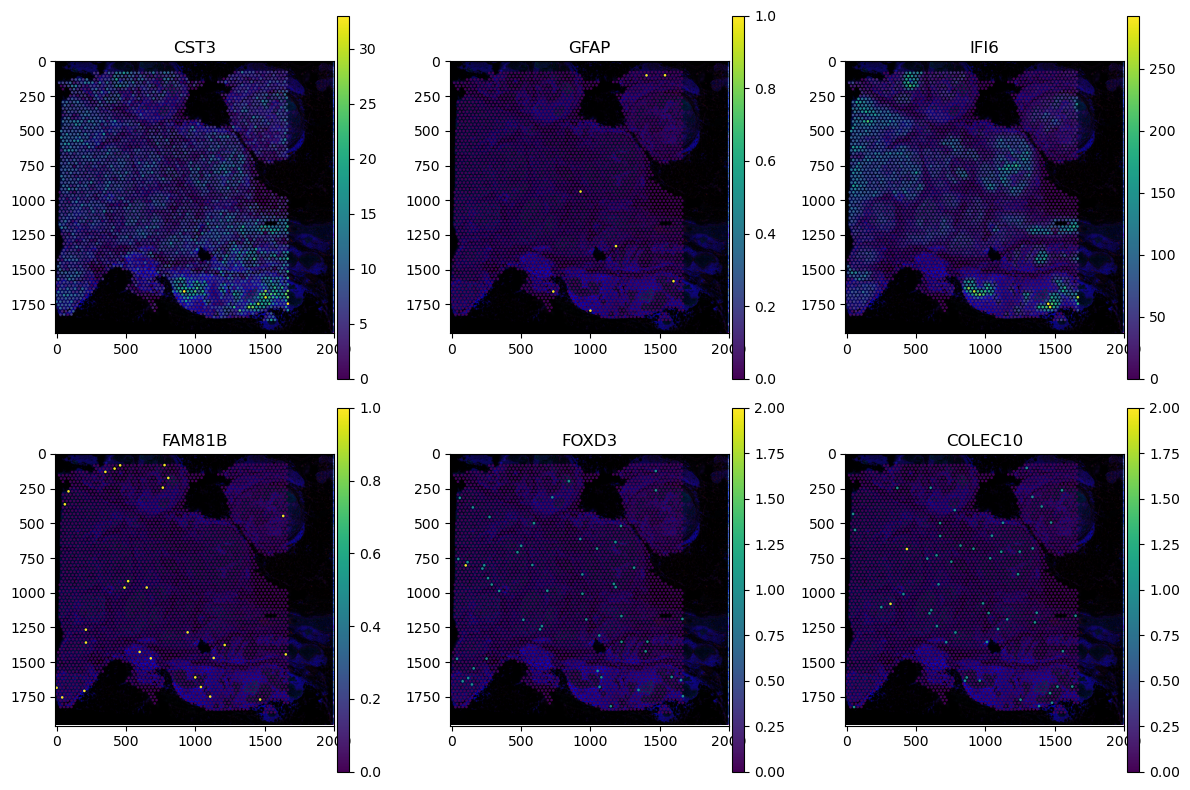

In [6]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for idx, gene in enumerate(["CST3", "GFAP", "IFI6", "FAM81B", "FOXD3", "COLEC10"]):
    (
        sdata_visium.pl.render_images()
        .pl.render_shapes(color=f"{gene}")
        .pl.show("downscaled_hires", ax=axs[idx // 3, idx % 3], title=gene)
    )

fig.tight_layout()

# RNA

In [7]:
import numpy as np
import scanpy as sc
import json
import os

# 1. Get the AnnData object (the table)
adata = sdata_visium["table"]
sample_key = "CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer"

# 2. Retrieve images using their full keys and transpose them.
hires_key = f"{sample_key}_hires_image"
lowres_key = f"{sample_key}_lowres_image"

# Retrieve image arrays
hires_img = np.array(sdata_visium.get(hires_key))
lowres_img = np.array(sdata_visium.get(lowres_key))

# Transpose from (channels, height, width) to (height, width, channels)
hires_img = np.transpose(hires_img, (1, 2, 0))
lowres_img = np.transpose(lowres_img, (1, 2, 0))

# 3. Attach the images to adata.uns under the 'spatial' key.
adata.uns["spatial"] = {sample_key: {}}
adata.uns["spatial"][sample_key]["images"] = {"hires": hires_img, "lowres": lowres_img}

# 4. Retrieve spatial coordinates from the Shapes element.
# Based on your printed tree, spatial coordinates for the sample are stored under the key matching sample_key.
coords_df = sdata_visium.get(sample_key)  # This should be a GeoDataFrame with 2 columns (e.g., 'x' and 'y')
print("Retrieved spatial coordinates. Columns:", coords_df.columns)

# Determine coordinate columns; adjust names as necessary.
if set(["x", "y"]).issubset(coords_df.columns):
    coords = coords_df[["x", "y"]].to_numpy()
elif set(["X", "Y"]).issubset(coords_df.columns):
    coords = coords_df[["X", "Y"]].to_numpy()
elif "geometry" in coords_df.columns:
    coords = np.vstack(coords_df["geometry"].centroid.apply(lambda geom: (geom.x, geom.y)))
else:
    raise ValueError("Could not find expected spatial coordinate columns. Found: " + ", ".join(coords_df.columns))

# Attach the coordinates to adata.obsm under the key "spatial"
adata.obsm["spatial"] = coords

# 5. Attach scale factors.
scalefactors_file = "spatial/scalefactors_json.json"
if os.path.exists(scalefactors_file):
    with open(scalefactors_file) as f:
        scalefactors = json.load(f)
    print("Loaded scale factors from JSON:", scalefactors)
else:
    print("Scale factors file not found, using dummy scale factors.")
    scalefactors = {"tissue_hires_scalef": 1.0, "tissue_lowres_scalef": 1.0}

adata.uns["spatial"][sample_key]["scalefactors"] = scalefactors



Retrieved spatial coordinates. Columns: Index(['geometry', 'radius'], dtype='object')
Loaded scale factors from JSON: {'regist_target_img_scalef': 0.25943702, 'tissue_hires_scalef': 0.08647901, 'tissue_lowres_scalef': 0.025943702, 'fiducial_diameter_fullres': 323.7419448316662, 'spot_diameter_fullres': 215.82796322111085}


# Probes - proteins

In [8]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import scanpy as sc
adata_protein = sc.read_10x_h5("CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_raw_probe_bc_matrix.h5")
print(adata_protein)

AnnData object with n_obs × n_vars = 4992 × 54580
    obs: 'filtered_barcodes'
    var: 'gene_ids', 'probe_ids', 'feature_types', 'filtered_probes', 'gene_name', 'genome', 'probe_region'


In [10]:
adata_protein.raw = adata_protein.copy()   # saves everything into .raw

In [11]:
import pandas as pd
iso_factors = pd.read_csv("CytAssist_FFPE_Protein_Expression_Human_Breast_Cancer_isotype_normalization_factors.csv", index_col=0)

In [12]:
adata_protein.obs

,filtered_barcodes
AACACCTACTATCGAA-1,False
AACACGTGCATCGCAC-1,False
AACACTTGGCAAGGAA-1,True
AACAGGAAGAGCATAG-1,False
AACAGGATTCATAGTT-1,True
...,...
TGTTGGAACGAGGTCA-1,True
TGTTGGAAGCTCGGTA-1,True
TGTTGGATGGACTTCT-1,True
TGTTGGCCAGACCTAC-1,True


In [13]:
adata_protein.var

,gene_ids,probe_ids,feature_types,filtered_probes,gene_name,genome,probe_region
CYP51A1|5c60a99,DEPRECATED_ENSG00000001630,DEPRECATED_ENSG00000001630|CYP51A1|5c60a99,Gene Expression,False,DEPRECATED_ENSG00000001630,GRCh38,unspliced
YBX2|6bb010c,DEPRECATED_ENSG00000006047,DEPRECATED_ENSG00000006047|YBX2|6bb010c,Gene Expression,False,DEPRECATED_ENSG00000006047,GRCh38,unspliced
YBX2|db3fdd6,DEPRECATED_ENSG00000006047,DEPRECATED_ENSG00000006047|YBX2|db3fdd6,Gene Expression,False,DEPRECATED_ENSG00000006047,GRCh38,unspliced
ALDH3B1|c41b7d0,DEPRECATED_ENSG00000006534,DEPRECATED_ENSG00000006534|ALDH3B1|c41b7d0,Gene Expression,False,DEPRECATED_ENSG00000006534,GRCh38,unspliced
DBF4|8e5434c,DEPRECATED_ENSG00000006634,DEPRECATED_ENSG00000006634|DBF4|8e5434c,Gene Expression,False,DEPRECATED_ENSG00000006634,GRCh38,unspliced
...,...,...,...,...,...,...,...
AL603764.2|f32fe8d,ENSG00000286135,ENSG00000286135|AL603764.2|f32fe8d,Gene Expression,True,AL603764.2,GRCh38,spliced
DERPC|7fd14c6,ENSG00000286140,ENSG00000286140|DERPC|7fd14c6,Gene Expression,True,DERPC,GRCh38,spliced
AC023490.5|5d2a909,ENSG00000286175,ENSG00000286175|AC023490.5|5d2a909,Gene Expression,False,AC023490.5,GRCh38,unspliced
NOTCH2NLC|ef88c77,ENSG00000286219,ENSG00000286219|NOTCH2NLC|ef88c77,Gene Expression,False,NOTCH2NLC,GRCh38,unspliced


## Protein pre-processing

In [14]:
# Show the column headers
print(iso_factors.columns)

# Peek at the first few rows
iso_factors.head()

Index(['in_tissue', 'normalization_factor'], dtype='object')


,in_tissue,normalization_factor
barcode,,
AACACCTACTATCGAA-1,0,30.211480
AACACGTGCATCGCAC-1,0,76.335878
AACACTTGGCAAGGAA-1,1,51.282051
AACAGGAAGAGCATAG-1,0,63.291139
AACAGGATTCATAGTT-1,1,67.114094


In [15]:
# Ensure your AnnData’s obs index matches the CSV index
assert all(adata_protein.obs_names.isin(iso_factors.index)), "Some barcodes missing in normalization file"

# Pull out the spot‑level factors in the same order as adata.obs
spot_factors = iso_factors.loc[adata_protein.obs_names, "normalization_factor"]

# Divide each spot’s counts by its factor
adata_protein.X = adata_protein.X / spot_factors.values[:, None]


In [ ]:
# # Convert X into CSR format (fast row slicing)
# adata_protein.X = adata_protein.X.tocsr()

# # Now you can slice normally
# print("After:", adata_protein.X[0, :5].toarray())


In [16]:
# 3️⃣ Aggregate probes → proteins
adata_protein.var["protein"] = adata_protein.var_names.str.split("|").str[0]
# Build dense DataFrame, group by protein, then back into AnnData
df = pd.DataFrame(adata_protein.X.toarray(),
                  index=adata_protein.obs_names,
                  columns=adata_protein.var["protein"])
protein_counts = df.groupby(axis=1, level=0).sum()
adata_pc = sc.AnnData(protein_counts)

/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_7247/1509023052.py:7: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  protein_counts = df.groupby(axis=1, level=0).sum()


In [17]:
# 4️⃣ Protein‑level QC
adata_pc.obs["total_counts"] = adata_pc.X.sum(axis=1)
adata_pc.obs["n_proteins"] = (adata_pc.X > 0).sum(axis=1)
adata_pc.var["pct_expressed"] = (adata_pc.X > 0).sum(axis=0) / adata_pc.n_obs

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(adata_pc.obs["total_counts"], bins=50)
plt.xlabel("Total protein counts per spot")
plt.ylabel("Number of spots")
plt.title("Distribution of total counts")
plt.show()


In [ ]:
plt.figure()
plt.hist(adata_pc.obs["n_proteins"], bins=50)
plt.xlabel("Proteins detected per spot")
plt.ylabel("Number of spots")
plt.title("Distribution of detected proteins")
plt.show()


In [ ]:
plt.figure()
plt.scatter(adata_pc.obs["total_counts"], adata_pc.obs["n_proteins"], s=5)
plt.xlabel("Total protein counts")
plt.ylabel("Number of proteins detected")
plt.title("Counts vs Detected Proteins")
plt.show()


In [ ]:
plt.figure()
plt.hist(adata_pc.var["pct_expressed"], bins=50)
plt.xlabel("Fraction of spots expressing protein")
plt.ylabel("Number of proteins")
plt.title("Protein expression frequency")
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Visualize cutoffs on your histogram again
plt.figure()
plt.hist(adata_pc.obs["n_proteins"], bins=50)
plt.axvline(2000, linestyle="--")
plt.axvline(9000, linestyle="--")
plt.xlabel("Proteins detected per spot")
plt.ylabel("Number of spots")
plt.title("QC: n_proteins with filtering thresholds")
plt.show()

# Scatter total_counts vs n_proteins
plt.figure()
plt.scatter(adata_pc.obs["total_counts"], adata_pc.obs["n_proteins"], s=5)
plt.axhline(2000, linestyle="--")
plt.axhline(9000, linestyle="--")
plt.axvline(10000, linestyle="--")
plt.xlabel("Total counts")
plt.ylabel("n_proteins")
plt.title("QC: Spots to keep")
plt.show()


In [ ]:
import scanpy as sc

# Suppose adata_protein is your protein AnnData
adata_pc.obs["total_counts"] = adata_pc.X.sum(axis=1)
adata_pc.obs["n_proteins"] = (adata_pc.X > 0).sum(axis=1)

sc.pl.violin(adata_pc
             , keys=["total_counts", "n_proteins"], jitter=0.4, multi_panel=True)


In [ ]:
adata_pc

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(adata_pc.obs["total_counts"], bins=50)
plt.xlabel("Total protein counts per spot")
plt.ylabel("Number of spots")
plt.title("Distribution of total_counts")
plt.show()


In [ ]:
plt.figure()
sns.histplot(adata_pc.obs["total_counts"].clip(upper=10000), bins=40)
plt.xlabel("Total protein counts (<10k)")
plt.ylabel("Number of spots")
plt.title("Total_counts (zoomed)")
plt.show()


In [ ]:
plt.figure()
sns.histplot(adata_pc.obs["n_proteins"], bins=60)
plt.xlabel("Proteins detected per spot")
plt.ylabel("Number of spots")
plt.title("Distribution of n_proteins")
plt.show()


In [ ]:
plt.figure()
sns.histplot(adata_pc.obs["n_proteins"].clip(upper=9000), bins=60)
plt.xlabel("Proteins detected (<9k)")
plt.ylabel("Number of spots")
plt.title("n_proteins (zoomed)")
plt.show()


In [18]:
mask = (
    (adata_pc.obs["n_proteins"] >= 2000) &
    (adata_pc.obs["n_proteins"] <= 9000)
)

print(f"Retaining {mask.sum()} / {adata_pc.n_obs} spots ({mask.mean():.1%})")

adata_pc = adata_pc[mask].copy()


Retaining 4208 / 4992 spots (84.3%)


In [19]:
adata_pc

AnnData object with n_obs × n_vars = 4208 × 18533
    obs: 'total_counts', 'n_proteins'
    var: 'pct_expressed'

In [20]:
sc.pp.filter_cells(adata_pc, min_genes=50)
sc.pp.filter_genes(adata_pc, min_cells=int(0.01 * adata_pc.n_obs))

adata_pc

AnnData object with n_obs × n_vars = 4208 × 14207
    obs: 'total_counts', 'n_proteins', 'n_genes'
    var: 'pct_expressed', 'n_cells'

# Align RNA and protein Visium data

In [21]:
# Sanity check: intersection of shared barcodes
common_barcodes = adata.obs_names.intersection(adata_pc.obs_names)

# Subset both AnnData objects to shared barcodes
adata_pc = adata_pc[common_barcodes].copy()


In [22]:
# Subset RNA object to match protein object
adata = adata[adata_pc.obs_names].copy()

In [24]:
adata

AnnData object with n_obs × n_vars = 4011 × 18085
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'spatialdata_attrs'
    obsm: 'spatial'

In [25]:
adata_pc

AnnData object with n_obs × n_vars = 4011 × 14207
    obs: 'total_counts', 'n_proteins', 'n_genes'
    var: 'pct_expressed', 'n_cells'

## RNA feature selection and dimensionality reduction

/opt/homebrew/Caskroom/mambaforge/base/envs/spatial_mamba/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


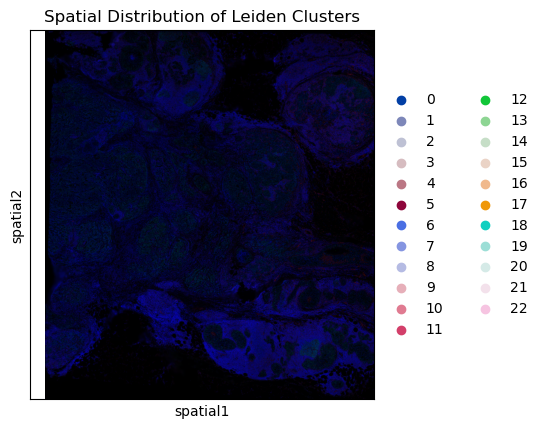

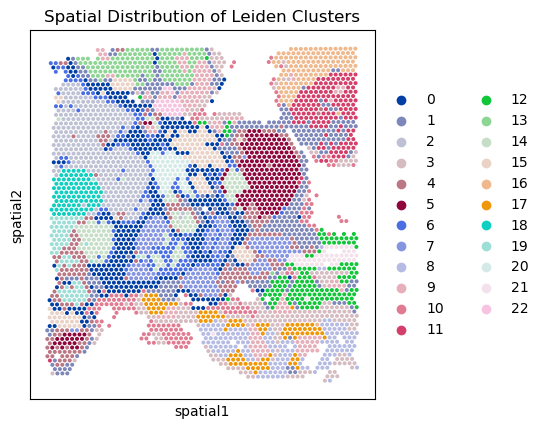

In [34]:

# Preprocess the data (adjust thresholds and parameters as needed)
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=3000, flavor="seurat")
adata = adata[:, adata.var.highly_variable]
# sc.pp.scale(adata, max_value=10)

# Dimensionality reduction
sc.tl.pca(adata, svd_solver='arpack')

# Compute neighborhood graph
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

# Run clustering with the Leiden algorithm
sc.tl.leiden(adata)

# Now plot the spatial distribution colored by the Leiden clusters
sc.pl.spatial(adata, color=["leiden"], spot_size=1.5, title="Spatial Distribution of Leiden Clusters")


sc.pl.spatial(
    adata, 
    color="leiden", 
    spot_size=250,  # try bigger values like 20, 50, or even 100
    alpha_img=0,  # make the tissue image semi-transparent
    title="Spatial Distribution of Leiden Clusters"
)


In [35]:
X = adata.X.toarray() if hasattr(adata.X, "toarray") else adata.X
print("dtype:", X.dtype)
print("min/max:", X.min(), "/", X.max())
print("mean:", X.mean(), " std:", X.std())
print("zero fraction:", np.mean(X == 0))

dtype: float32
min/max: 0.0 / 8.494014
mean: 0.22979572  std: 0.5040056
zero fraction: 0.7600769550403058


In [37]:
adata

AnnData object with n_obs × n_vars = 4011 × 3000
    obs: 'in_tissue', 'array_row', 'array_col', 'spot_id', 'region', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'spatial', 'spatialdata_attrs', 'log1p', 'hvg', 'pca', 'neighbors', 'leiden', 'leiden_colors'
    obsm: 'spatial', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [36]:
adata.write_h5ad("VisiumRNABC_v2.h5ad")

# Protein feature selection and dimensionality reduction

In [26]:
# 5️⃣ Normalization (CLR),  HVG selection, scaling

sc.pp.normalize_total(adata_pc, target_sum=1e4)
sc.pp.log1p(adata_pc)

# Now safe: no zero‑variance proteins
sc.pp.highly_variable_genes(
    adata_pc,
    flavor="seurat",
    n_top_genes=2000,
    subset=True
)

print(f"{adata_pc.n_vars} highly variable proteins retained")


2000 highly variable proteins retained


In [ ]:
# sc.pp.scale(adata_pc, max_value=10)

In [27]:
# 6️⃣ Dimensionality reduction + UMAP
sc.tl.pca(adata_pc)
sc.pp.neighbors(adata_pc, n_neighbors=15, n_pcs=30)
sc.tl.umap(adata_pc)

/opt/homebrew/Caskroom/mambaforge/base/envs/spatial_mamba/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [28]:
# Leiden clustering at default resolution (0.5)
sc.tl.leiden(adata_pc, resolution=0.5)

/var/folders/hr/f3msc_bs3z53n3_m4c4ry6tc0000gn/T/ipykernel_7247/3983382292.py:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_pc, resolution=0.5)


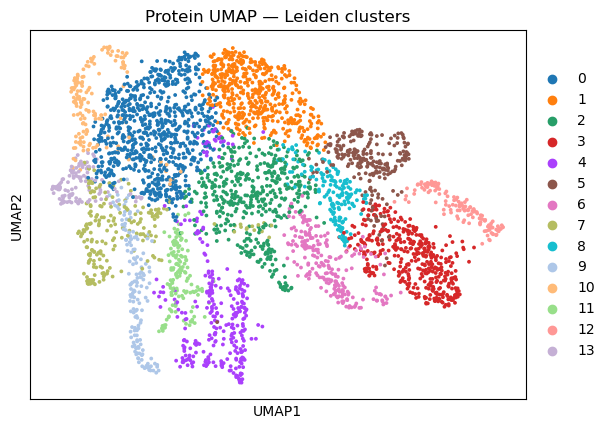

In [29]:
sc.pl.umap(adata_pc, color="leiden", title="Protein UMAP — Leiden clusters")

In [30]:
X = adata_pc.X.toarray() if hasattr(adata_pc.X, "toarray") else adata_pc.X
print("dtype:", X.dtype)
print("min/max:", X.min(), "/", X.max())
print("mean:", X.mean(), " std:", X.std())
print("zero fraction:", np.mean(X == 0))

dtype: float64
min/max: 0.0 / 8.45481290027487
mean: 0.305236107503407  std: 0.5520308909495081
zero fraction: 0.6721327599102468


In [32]:
adata_pc

AnnData object with n_obs × n_vars = 4011 × 2000
    obs: 'total_counts', 'n_proteins', 'n_genes', 'leiden'
    var: 'pct_expressed', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [33]:
# adata_pc.write_h5ad("VisiumProteinBC_v2.h5ad")

In [ ]:
sc.pl.umap(adata_pc, color="IL6")

In [ ]:
sc.tl.rank_genes_groups(
    adata_pc,
    groupby="leiden",        # use cluster labels
    method="t-test",         # or "wilcoxon"
    use_raw=False
)


In [ ]:
sc.pl.rank_genes_groups(adata_pc, n_genes=5, sharey=False)

In [ ]:
import pandas as pd

# Grab top 3 proteins per cluster
result = adata_pc.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_proteins = pd.DataFrame({group: result['names'][group][:3] for group in groups})

# Flatten the list and remove duplicates
top_proteins_flat = list(set(top_proteins.values.ravel()))


In [ ]:
sc.pl.heatmap(
    adata_pc,
    var_names=top_proteins_flat,
    groupby="leiden",
    swap_axes=True,
    cmap="viridis",
    dendrogram=True
)


In [ ]:
sc.pl.dotplot(
    adata_pc,
    var_names=top_proteins_flat,  # your top markers
    groupby="leiden",
    standard_scale="var",         # normalize across proteins
    dendrogram=True,              # ⬅️ adds hierarchical clustering to clusters
    dot_max=0.5,
    color_map="Blues"
)


In [ ]:
adata_pc

In [23]:
# Check equality
print((adata_pc.obs_names == adata.obs_names).all())  # True?

# Or how many are shared
print(f"Shared barcodes: {len(adata_pc.obs_names.intersection(adata.obs_names))}")


True
Shared barcodes: 4011


In [ ]:
# Get top 10 HVGs from adata.var
top10_genes = adata.var.sort_values("highly_variable", ascending=False).head(10).index.tolist()

# Violin plot
sc.pl.violin(adata, top10_genes, groupby="leiden", jitter=0.4, rotation=90)

In [ ]:
# Get top 10 HV proteins
top10_proteins = adata_pc.var.sort_values("highly_variable", ascending=False).head(10).index.tolist()

# Violin plot
sc.pl.violin(adata_pc, top10_proteins, groupby="leiden", jitter=0.4, rotation=90)


In [ ]:
sc.pl.dotplot(adata, top10_genes, groupby="leiden", standard_scale="var", dot_max=0.4)
sc.pl.dotplot(adata_pc, top10_proteins, groupby="leiden", standard_scale="var", dot_max=0.4)